### Handwritten digits recognisation using multiple regression

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [3]:
digits = load_digits() #LOAD KELA DATASET

#### LIST OF COLUMNS IN DATASET

In [4]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

### Discovering different columns in dataset

In [5]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [6]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [7]:
digits.target[1:5]

array([1, 2, 3, 4])

#### TO SEE ACTUAL IMAGES:

<Figure size 432x288 with 0 Axes>

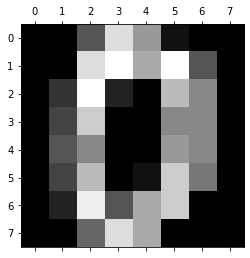

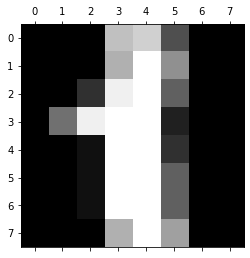

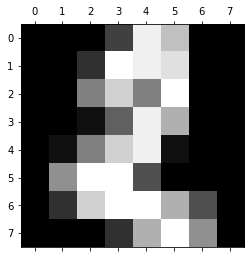

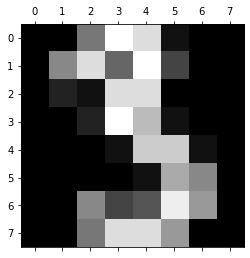

In [8]:
plt.gray()
for i in range(0,4):
    plt.matshow(digits.images[i])

#### So these are the images in the dataset

#### NOW IMPORTING THE MODEL , SPLIT, FIT, PREDICT

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split( digits.data, digits.target, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(1437, 64)

In [12]:
X_test.shape

(360, 64)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# model = LogisticRegression(multi_class='auto',solver='lbfgs')

In [14]:
model.fit(X_train,y_train,sample_weight=None)

/home/meghana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/meghana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### PREDICTION :

In [15]:
model.predict(digits.data[[5]])

array([5])

#### ACTUAL CHECK  :

In [16]:
digits.target[5]

5

#### BOTH ARE SAME `

In [17]:
model.score(X_train,y_train)

0.9937369519832986

#### IF THE SCORE ISN'T 100% THEN WHERE IS THE MISTAKE?
#### CONFUSION MATRIX:
    #y_pred stores values predicted for x_test
    #Also y_test has original outputs for x_test
    #Confusion matrix basically will compare both by taking them as arguments (y_test,y_pred)
    

In [18]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y_test,y_pred)

In [20]:
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 27,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 44,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 45,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4, 36]])

#### PUTTING IT IN A BETTER WAY....

Text(69.0, 0.5, 'ACTUAL VALUES')

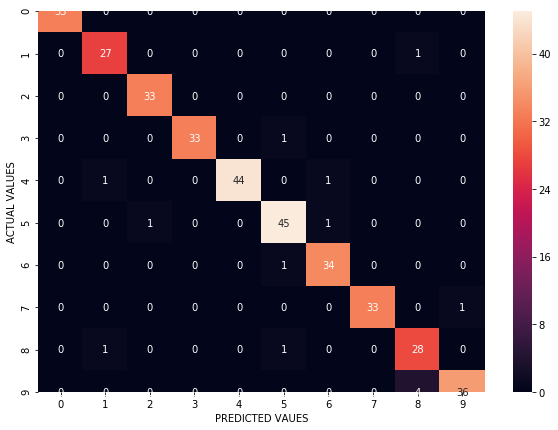

In [21]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('PREDICTED VAUES')
plt.ylabel('ACTUAL VALUES')

#### Basically in the above graph jidhar 0 nahi hai udhar galati hai

    #(8,1) wala 1 says : for '1' time, model has predicted '8' as '1' in the learning process 
     because, '8' on the TRUTH SIDE and '1' on the PREDICTED SIDE